In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("spam.csv",encoding="latin-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns=["Class","Text"] #Renamed the columns

In [8]:
df.sample(2)

,Class,Text
4122,ham,"Cool, want me to go to kappa or should I meet ..."
1793,ham,You bad girl. I can still remember them


In [9]:
df["Label"]=df["Class"].map({"ham":0,"spam":1})

In [10]:
df.sample(2)

,Class,Text,Label
1051,ham,Do u noe wat time e place dat sells 4d closes?,0
3193,ham,And you! Will expect you whenever you text! Ho...,0


<AxesSubplot:xlabel='Class', ylabel='count'>

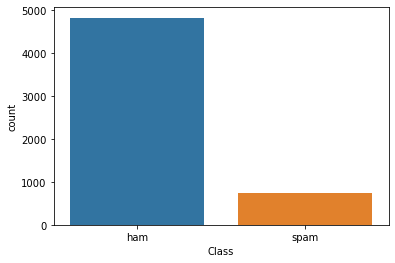

In [11]:
sns.countplot(x=df["Class"])

In [12]:
df['Text']=df['Text'].str.lower() #Step 1:  Butun cumleleri kucuk harfe cevir
df['Text']=df['Text'].str.replace('[^\w\s]','')#Step 2:  Noktalama Isaretlerini kaldir
df['Text']=df['Text'].str.replace('\d+','') #Step 3:Rakamlari kaldir
df['Text']=df['Text'].str.replace('\n',' ').replace('\r',' ') #Step 4: Satir sonu ve enter \r \n 

In [13]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,stopwords='STOPWORDS')
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")


In [14]:
ham=df[df["Class"]=='ham']['Text']

In [15]:
spam=df[df["Class"]=='spam']['Text']

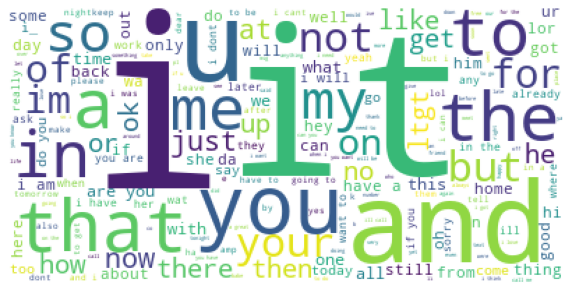

In [16]:
wc(ham,'white')

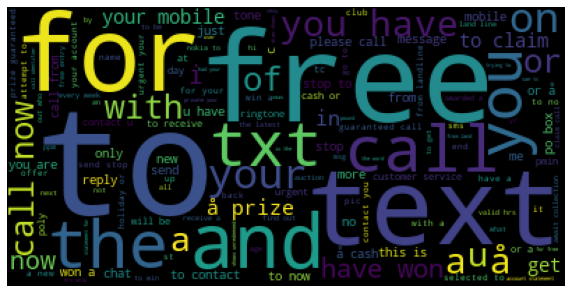

In [17]:
wc(spam,'black')

In [18]:
x=df["Text"]
y=df["Label"]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [20]:
vect1=CountVectorizer(stop_words="english")

In [21]:
x=vect1.fit_transform(x)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=15)

In [23]:
mb=MultinomialNB()

In [24]:
tahmin1=mb.fit(x_train,y_train).predict(x_test)

In [25]:
accuracy_score(tahmin1,y_test)

1.0

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
d=DecisionTreeClassifier()

In [28]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
tahmin2=d.predict(x_test)

In [30]:
accuracy_score(tahmin2,y_test)

0.9333333333333333